In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from nested_lookup import nested_delete
from src import functions as fcn

In [2]:
lambdas = [
    0.366875964264129 + 0.520259438865201*1j, #3/14
    0.595743941976559 + 0.254425889416369*1j #3/8
]

In [8]:
neighborgraph = fcn.nbhG(lambdas[1],13)
neighborgraph

{'id': {'h1': {'label': '- +', 'weight': 0.25}},
 'h1': {'h3': {'label': '+ -', 'weight': 0.75}},
 'h3': {'h5': {'label': '+ -', 'weight': 0.75}},
 'h5': {'h5': {'label': '- +', 'weight': 0.25}}}

In [3]:
neighborgraph = fcn.nbhG(lambdas[1],13)
neighborgraph

{'id': {'h1': {'label': '- +', 'weight': 0.25}},
 'h1': {'h2': {'label': ' + '}},
 'h2': {'h2': {'label': ' - '}}}

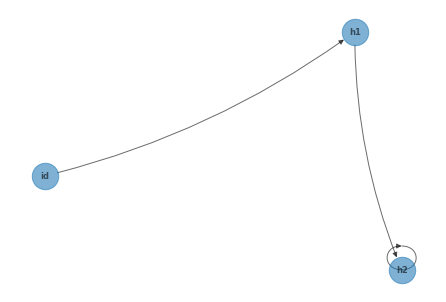

In [4]:
newG =nx.DiGraph(neighborgraph)

# for k,v in neighborgraph.items():
#     if len(v)==0:
#         neighborgraph = nested_delete(neighborgraph,k)
        
newG =nx.DiGraph(neighborgraph)

# deadnodes = [node for node,degree in dict(newG.out_degree()).items() if degree == 0]
# newG.remove_nodes_from(deadnodes)

options = {
#     'width':1.0,
#     'node_color':'white',
    'alpha':0.572,
#     'edge_color':'white',
    'node_size':700,
    "connectionstyle":'arc3, rad = 0.1',
    'with_labels':True,
    'font_size':'small',
    'font_color':'black',
    'font_weight':'bold'
}

pos = nx.spectral_layout(newG)
nx.draw(newG,pos,**options)